In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def rmsd(x, x_qm):
    return ((x - x_qm) ** 2).mean() ** 0.5

In [3]:
rmsds_esp = []
rmsds_gaff1 = []
rmsds_gaff2 = []
rmsds_off = []
rmsds_qm = []

In [4]:
for n in range(78):
    try:
        x_esp = np.load("compare_plot_parsley/x_esp_%s.npy" % n)
        x_gaff1 = np.load("compare_plot_parsley/x_gaff1_%s.npy" % n)
        x_gaff2 = np.load("compare_plot_parsley/x_gaff2_%s.npy" % n)
        x_off = np.load("compare_plot_parsley/x_openff_%s.npy" % n)
        x_qm = np.load("compare_plot_parsley/x_qm_%s.npy" % n)

        rmsd_esp = rmsd(x_esp, x_qm)
        rmsd_gaff1 = rmsd(x_gaff1, x_qm)
        rmsd_gaff2 = rmsd(x_gaff2, x_qm)
        rmsd_off = rmsd(x_off, x_qm)

        rmsds_esp.append(rmsd_esp)
        rmsds_gaff1.append(rmsd_gaff1)
        rmsds_gaff2.append(rmsd_gaff2)
        rmsds_off.append(rmsd_off)
    except:
        print(n)



16


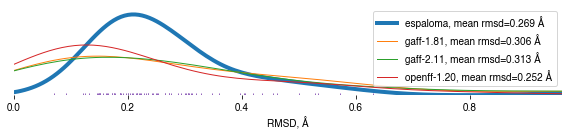

In [6]:
import seaborn as sns
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Helvetica']
plt.figure(figsize=(8, 2))
plt.box(False)
sns.kdeplot(rmsds_esp, label="espaloma, mean rmsd=%.3f Å" % np.mean(rmsds_esp), linewidth=4)
sns.kdeplot(rmsds_gaff1, label="gaff-1.81, mean rmsd=%.3f Å" % np.mean(rmsds_gaff1), linewidth=1)
sns.kdeplot(rmsds_gaff2, label="gaff-2.11, mean rmsd=%.3f Å" % np.mean(rmsds_gaff2), linewidth=1)
sns.kdeplot(rmsds_off, label="openff-1.20, mean rmsd=%.3f Å" % np.mean(rmsds_off), linewidth=1)
sns.rugplot(rmsds_esp)
plt.xlim(0, max(rmsds_esp))
plt.xlabel("RMSD, Å")
plt.legend(loc="upper right")
frame = plt.gca()
frame.axes.get_yaxis().set_visible(False)
plt.tight_layout()
plt.savefig("kde.png", dpi=299)

In [ ]:
np.argmax(rmsds_esp)

46

In [ ]:
import espaloma as esp
ds = esp.data.dataset.GraphDataset.load("../minimize_plot/merged_parsley")

Using backend: pytorch


In [ ]:
ds.shuffle(2666)
_, ds, __ = ds.split([8, 1, 1])

In [ ]:
g = esp.Graph("[H][C]1=[C]([Cl])[S][C]([Cl])=[C]1[C](=[O])[N]1[C]([H])([H])[C]([H])([H])[C]([H])([H])[S]1(=[O])=[O]")
from simtk.unit import Unit, Quantity
from simtk.unit import *
x_old = Quantity(np.load("x_qm_64.npy"), unit=angstrom)
x_new = Quantity(np.load("x_esp_64.npy"), unit=angstrom)
g.mol.add_conformer(x_old)
g.mol.to_file("min_qm.sdf", "sdf")
g.mol._conformers = []
g.mol.add_conformer(x_new)
g.mol.to_file("min_esp", "sdf")

In [ ]:
rmsds_esp[46]

0.9588522144481579

In [ ]:
rmsds_esp[int(0.5 * float(len(rmsds_esp)))])

array([0])

In [ ]:
int(0.5 * float(len(rmsds_esp)))

38

In [ ]:
np.argsort(rmsds_esp)[38]

33

In [ ]:
rmsds_esp[33]

0.23561125396509175

In [ ]:
np.median(rmsds_esp)

0.23561125396509175

In [ ]:
np.max(rmsds_esp)

0.9588522144481579